# Laboratorio 5 - Autocodificadores
## Data Science Sección 20
~ Samuel Chamale 21885

~ Adrian Rodriguez 21691

In [164]:
# Import necessary libraries
import pandas as pd
import numpy as np
from io import StringIO
from adjustText import adjust_text
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Dropout, BatchNormalization
from tensorflow.keras import regularizers

## Parte 1: Preparación de Datos

### 1.1 Cargar los datos en un DataFrame de Pandas

In [126]:
CSV_PATH = 'UK_foods.csv'

In [127]:
df = pd.read_csv(CSV_PATH) # Leer los datos del dataframe

In [128]:
# Renombrar la primera columna y establecerla como índice
df.rename(columns={'Unnamed: 0': 'Food'}, inplace=True)
df.set_index('Food', inplace=True)

In [129]:
# Mostrar las primeras filas del DataFrame
print("DataFrame Head:")
df.head()

DataFrame Head:


,England,Wales,Scotland,N.Ireland
Food,,,,
Cheese,105,103,103,66
Carcass_meat,245,227,242,267
Other_meat,685,803,750,586
Fish,147,160,122,93
Fats_and_oils,193,235,184,209


### 1.2 Realizar una exploración básica de los datos

In [130]:
# Mostrar información del DataFrame
print("\nDataFrame Info:")
df.info()


DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
Index: 17 entries, Cheese to Confectionery 
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   England    17 non-null     int64
 1   Wales      17 non-null     int64
 2   Scotland   17 non-null     int64
 3   N.Ireland  17 non-null     int64
dtypes: int64(4)
memory usage: 680.0+ bytes


In [131]:
# Comprobar valores faltantes en cada columna
print("\nValores faltantes en cada columna:")
print(df.isnull().sum())


Valores faltantes en cada columna:
England      0
Wales        0
Scotland     0
N.Ireland    0
dtype: int64


In [132]:
# Mostrar estadísticas descriptivas
print("\nEstadísticas Descriptivas:")
print(df.describe())


Estadísticas Descriptivas:
           England        Wales     Scotland    N.Ireland
count    17.000000    17.000000    17.000000    17.000000
mean    469.647059   503.941176   460.235294   429.941176
std     452.701466   463.859282   469.595907   479.896014
min      54.000000    64.000000    53.000000    41.000000
25%     156.000000   175.000000   147.000000   135.000000
50%     253.000000   265.000000   242.000000   209.000000
75%     685.000000   803.000000   566.000000   586.000000
max    1472.000000  1582.000000  1572.000000  1506.000000


### 1.3 Normalizar los datos

In [133]:
# Inicializar el StandardScaler
scaler = StandardScaler()

In [134]:
# Ajustar y transformar los datos
scaled_data = scaler.fit_transform(df.values)

In [135]:
# Crear un nuevo DataFrame con los datos escalados
df_scaled = pd.DataFrame(scaled_data, index=df.index, columns=df.columns)

In [136]:
# Mostrar las primeras filas de los datos escalados
print("\nDatos Escalados Head:")
print(df_scaled.head())


Datos Escalados Head:
                 England     Wales  Scotland  N.Ireland
Food                                                   
Cheese         -0.830281 -0.890961 -0.784142  -0.781715
Carcass_meat   -0.511509 -0.615412 -0.479033  -0.349984
Other_meat      0.490347  0.664561  0.636042   0.335201
Fish           -0.734650 -0.764297 -0.742436  -0.723721
Fats_and_oils  -0.629910 -0.597634 -0.606344  -0.474563


## Parte 2: Construcción del Autocodificador

### 2.1 Utilizar todas las observaciones para entrenar el modelo

In [137]:
# Usar todos los datos para entrenamiento
X_train = df_scaled.values

### 2.2 Definir la arquitectura del autocodificador

In [138]:
# Dimensión de entrada (número de características)
input_dim = X_train.shape[1]   # Debería ser 4

In [139]:
# Capa de entrada
input_layer = Input(shape=(input_dim,))

In [140]:
# Capas de codificación con regularización y normalización
encoded = Dense(2, activation='relu')(input_layer)  # Reducir directamente a 2 dimensiones

In [141]:
# Capas de decodificación con regularización y normalización
decoded = Dense(2, activation='relu')(encoded)
output_layer = Dense(input_dim, activation='linear')(decoded)

In [142]:
# Definir el modelo de autocodificador
autoencoder = Model(inputs=input_layer, outputs=output_layer)

In [143]:
# Definir el modelo de codificador para reducción de dimensionalidad
encoder = Model(inputs=input_layer, outputs=encoded)

In [144]:
# Mostrar resumen del modelo
print("\nResumen del Autocodificador:")
autoencoder.summary()


Resumen del Autocodificador:


Model: "functional_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_4 (InputLayer)      │ (None, 4)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 2)              │            10 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_24 (Dense)                │ (None, 2)              │             6 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_25 (Dense)                │ (None, 4)              │            12 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 28 (112.00 B)

 Trainable params: 28 (112.00 B)

 Non-trainable params: 0 (0.00 B)

### 2.3 Compilar y entrenar el modelo

In [145]:
# Compilar el autocodificador
autoencoder.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss='mse')

In [146]:
# Definimos las funciones de callback
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=20, restore_best_weights=True)

In [147]:
history = autoencoder.fit(
    X_train,
    X_train,
    epochs=500,
    batch_size=4,
    shuffle=True,
    verbose=0,  # Para no mostrar salida detallada
    callbacks=[early_stopping]
)

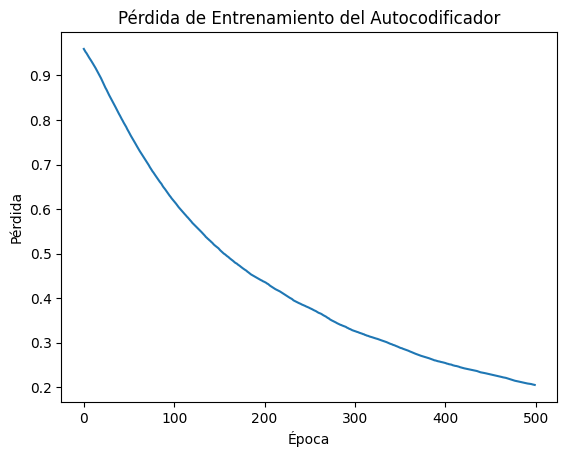

In [148]:
# Graficar la pérdida de entrenamiento
plt.figure()
plt.plot(history.history['loss'])
plt.title('Pérdida de Entrenamiento del Autocodificador')
plt.xlabel('Época')
plt.ylabel('Pérdida')
plt.show()

### 2.4 Evaluar el rendimiento del autocodificador

In [149]:
# Reconstruir los datos de entrada
reconstructed_data = autoencoder.predict(X_train)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


In [150]:
# Calcular el Error Cuadrático Medio (MSE)
mse = tf.keras.losses.MeanSquaredError()
reconstruction_loss = mse(X_train, reconstructed_data).numpy()

In [151]:
print(f"\nPérdida de Reconstrucción (MSE): {reconstruction_loss}")


Pérdida de Reconstrucción (MSE): 0.20500193536281586


## Parte 3: Reducción de Dimensionalidad y Visualización

### 3.1 Utilizar el autocodificador para reducir las dimensiones a 2

In [ ]:
# Obtener la representación comprimida de los datos
compressed_data = encoder.predict(X_train)

In [ ]:
# Crear un DataFrame con los datos comprimidos
df_compressed = pd.DataFrame(compressed_data, index=df.index, columns=['Dim1', 'Dim2'])

In [162]:
# Mostrar las primeras filas de los datos comprimidos
print("\nDatos Comprimidos Head:")
print(df_compressed.head())


Datos Comprimidos Head:
                    Dim1      Dim2
Food                              
Cheese          1.627857  2.501859
Carcass_meat    1.269745  1.848493
Other_meat      0.334307  0.000000
Fish            1.539547  2.377969
Fats_and_oils   1.302197  2.014410


### 3.2 Visualizar las dos dimensiones en un gráfico de dispersión


C:\Users\chama\AppData\Local\Temp\ipykernel_27744\2667328302.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  texts.append(plt.text(df_compressed['Dim1'][i], df_compressed['Dim2'][i], food))


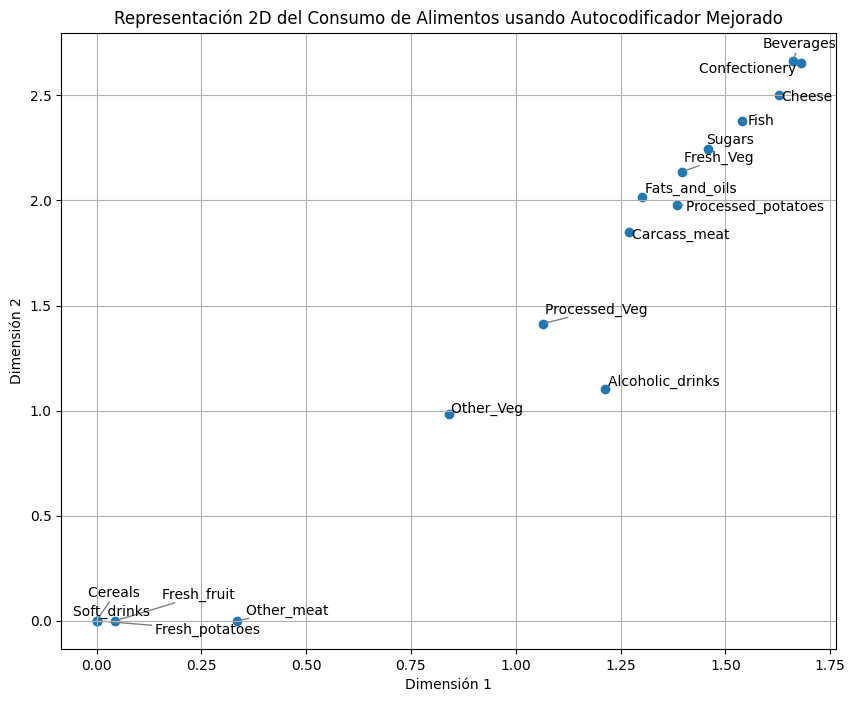

In [165]:
plt.figure(figsize=(10, 8))
plt.scatter(df_compressed['Dim1'], df_compressed['Dim2'])

# Crear una lista para almacenar los objetos de texto
texts = []
for i, food in enumerate(df_compressed.index):
    texts.append(plt.text(df_compressed['Dim1'][i], df_compressed['Dim2'][i], food))

# Ajustar las posiciones de las etiquetas para evitar superposiciones
adjust_text(texts, arrowprops=dict(arrowstyle='-', color='grey'))

plt.title('Representación 2D del Consumo de Alimentos usando Autocodificador Mejorado')
plt.xlabel('Dimensión 1')
plt.ylabel('Dimensión 2')
plt.grid(True)
plt.show()

## 3.3 Interpretación de lo que representan estas dos nuevas dimensiones en relación con el consumo de alimentos.